In [6]:
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt

from utils.funs import count_outliers
from utils.symmetry_scores import get_scores_full

from transformers import AutoModelForCausalLM

In [7]:
dir = '../../../../_data/fig-symmetry-language-models/full-models/OPT-query-key.pkl'

if os.path.isfile(dir):
    with open(dir, 'rb') as file:
        models = pickle.load(file)
else: models = {}

In [8]:
## missing 30B, 66B, 175B models for memory issue

path = ["model.decoder.layers[", "].self_attn.q_proj.weight", "].self_attn.k_proj.weight"]

'OPT 125m (l = 12, d = 768, h = 12 ; 125M parameters)'
dh = 64
l = 12
d = 768
h = d // dh

model = AutoModelForCausalLM.from_pretrained("facebook/opt-125m")
score_List= get_scores_full(d, l, h, dh, model, path)
models['OPT-125m'] = [l, d, h, dh, score_List]

'OPT-350m (l = 24, d = 1024, h = 16 ; 350M parameters)'
dh = 64
l = 24
d = 1024
h = d // dh

model = AutoModelForCausalLM.from_pretrained("facebook/opt-350m")
score_List= get_scores_full(d, l, h, dh, model, path)
models['OPT-350m'] = [l, d, h, dh, score_List]

'OPT-1.3b (l = 24, d = 2048, h = 32 ; 1.3B parameters)'
dh = 64
l = 24
d = 2048
h = d // dh

model = AutoModelForCausalLM.from_pretrained("facebook/opt-1.3b")
score_List= get_scores_full(d, l, h, dh, model, path)
models['OPT-1.3b'] = [l, d, h, dh, score_List]

'OPT-2.7b (l = 32, d = 2560, h = 32 ; 2.7B parameters)'
dh = 80
l = 32
d = 2560
h = d // dh

model = AutoModelForCausalLM.from_pretrained("facebook/opt-2.7b")
score_List= get_scores_full(d, l, h, dh, model, path)
models['OPT-2.7b'] = [l, d, h, dh, score_List]

'OPT-6.7b (l = 32, d = 4096, h = 32 ; 6.7B parameters)'
dh = 128
l = 32
d = 4096
h = d // dh

model = AutoModelForCausalLM.from_pretrained("facebook/opt-6.7b")
score_List= get_scores_full(d, l, h, dh, model, path)
models['OPT-6.7b'] = [l, d, h, dh, score_List]

'OPT-13b (l = 40, d = 5120, h = 40 ; 13B parameters)'
dh = 128
l = 40
d = 5120
h = d // dh

model = AutoModelForCausalLM.from_pretrained("facebook/opt-13b")
score_List= get_scores_full(d, l, h, dh, model, path)
models['OPT-13b'] = [l, d, h, dh, score_List]

Loading checkpoint shards: 100%|██████████| 3/3 [00:51<00:00, 17.27s/it]


In [9]:
'save'
with open(dir, 'wb') as file:
    pickle.dump(models, file)

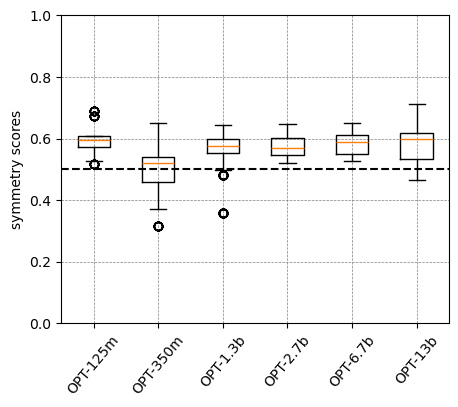

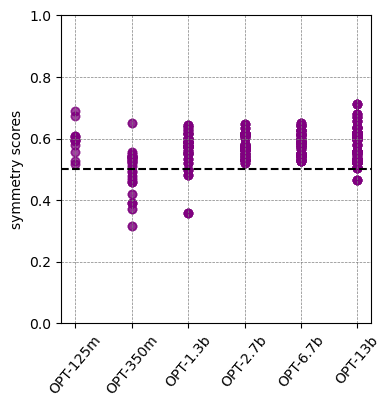

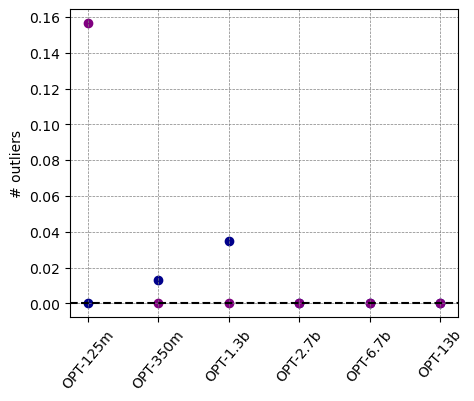

In [10]:
from utils.visualization import symmetry_score_boxplot, symmetry_score_scatter, symmetry_score_outliers

symmetry_score_boxplot(models)
symmetry_score_scatter(models)
symmetry_score_outliers(models)